<a href="https://colab.research.google.com/github/shrisha337-beep/Smartphone-Usage-Analysis/blob/main/Teen_Smartphone_Usage_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing Dependencies

In [2]:
!pip install numpy pandas matplotlib seaborn scikit-learn xgboost yellowbrick plotly -U kaleido

Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')



Configuration: Column Mapping

In [4]:
CONFIG = {
    # Required-ish (adapt to your dataset)
    'id': 'ID',
    'age': 'Age',
    'gender': 'Gender', #category wise
    'screen_time_daily': 'Daily_Usage_Hours', #continous
    'bedtime_usage': 'Screen_Time_Before_Bed', #continous or category wise
    'sleep_hours': 'Sleep_Hours', #continous
    'sleep_quality': 'Sleep_Hours', #category wise or score # Assuming Sleep_Hours can also indicate quality to some extent based on distribution
    'academic_score': 'Academic_Performance',  # continuous or percentage
    'addiction_level': 'Addiction_Level',  # categorical: e.g., low/medium/high
    'anxiety_score': 'Anxiety_Level',
    'depression_score': 'Depression_Level',
    # Optional activity breakdown - these columns are not in the dataset
    # 'app_category': 'app_category',
    # 'daily_time_minutes': 'daily_time_minutes',
    # Optional datetime - this column is not in the dataset
    # 'timestamp': 'date'
}

CONFIG

{'id': 'ID',
 'age': 'Age',
 'gender': 'Gender',
 'screen_time_daily': 'Daily_Usage_Hours',
 'bedtime_usage': 'Screen_Time_Before_Bed',
 'sleep_hours': 'Sleep_Hours',
 'sleep_quality': 'Sleep_Hours',
 'academic_score': 'Academic_Performance',
 'addiction_level': 'Addiction_Level',
 'anxiety_score': 'Anxiety_Level',
 'depression_score': 'Depression_Level'}

DataSet Loading

In [5]:
url = "https://drive.google.com/uc?export=download&id=1DePmeUHie02VpjVm3-UGJM9r9f42ReFq"
df = pd.read_csv(url)
print("Dataset loaded. Shape:", df.shape)
df.head()

Dataset loaded. Shape: (3000, 25)


,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


Data Overview

In [6]:
print('Shape:', df.shape)
display(df.sample(min(5,len(df))))
display(df.info())
display(df.describe(include="all"))

Shape: (3000, 25)


,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
338,339,Robert Hays,14,Other,East Daniel,9th,9.2,8.3,96,2,...,2.0,95,14,1.6,1.0,1.9,Education,4,4.2,10.0
1970,1971,William Baker,18,Other,North Jennifer,12th,4.3,4.8,60,4,...,1.0,127,14,1.6,1.9,1.1,Gaming,4,6.6,10.0
735,736,Matthew Smith,15,Male,Smithberg,9th,0.3,6.5,56,2,...,1.3,135,16,1.1,0.0,1.0,Browsing,2,5.0,4.1
1649,1650,Daniel Perez,16,Male,Greerstad,12th,8.0,4.8,86,10,...,1.2,96,16,3.8,2.3,1.0,Gaming,2,7.7,10.0
2024,2025,Rose Figueroa,17,Male,Robertohaven,8th,3.4,6.0,50,9,...,0.3,150,5,1.6,0.3,1.2,Social Media,5,4.7,6.3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   int64  
 1   Name                    3000 non-null   object 
 2   Age                     3000 non-null   int64  
 3   Gender                  3000 non-null   object 
 4   Location                3000 non-null   object 
 5   School_Grade            3000 non-null   object 
 6   Daily_Usage_Hours       3000 non-null   float64
 7   Sleep_Hours             3000 non-null   float64
 8   Academic_Performance    3000 non-null   int64  
 9   Social_Interactions     3000 non-null   int64  
 10  Exercise_Hours          3000 non-null   float64
 11  Anxiety_Level           3000 non-null   int64  
 12  Depression_Level        3000 non-null   int64  
 13  Self_Esteem             3000 non-null   int64  
 14  Parental_Control        3000 non-null   

None

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
count,3000.000000,3000,3000.000000,3000,3000,3000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000,3000.000000,3000.000000,3000.000000
unique,NaN,2933,NaN,3,2726,6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN
top,NaN,Michael Garcia,NaN,Male,North Michael,12th,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Browsing,NaN,NaN,NaN
freq,NaN,3,NaN,1016,6,529,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,627,NaN,NaN,NaN
mean,1500.500000,NaN,15.969667,NaN,NaN,NaN,5.020667,6.489767,74.947333,5.097667,...,1.006733,83.093000,12.609333,2.499233,1.525267,1.016333,NaN,5.459667,6.015100,8.881900
std,866.169729,NaN,1.989489,NaN,NaN,NaN,1.956501,1.490713,14.684156,3.139333,...,0.492878,37.747044,4.611486,0.988201,0.932701,0.648341,NaN,2.864572,2.014776,1.609598
min,1.000000,NaN,13.000000,NaN,NaN,NaN,0.000000,3.000000,50.000000,0.000000,...,0.000000,20.000000,5.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,1.000000
25%,750.750000,NaN,14.000000,NaN,NaN,NaN,3.700000,5.500000,62.000000,2.000000,...,0.700000,51.000000,9.000000,1.800000,0.800000,0.500000,NaN,3.000000,4.700000,8.000000
50%,1500.500000,NaN,16.000000,NaN,NaN,NaN,5.000000,6.500000,75.000000,5.000000,...,1.000000,82.000000,13.000000,2.500000,1.500000,1.000000,NaN,5.000000,6.000000,10.000000
75%,2250.250000,NaN,18.000000,NaN,NaN,NaN,6.400000,7.500000,88.000000,8.000000,...,1.400000,115.250000,17.000000,3.200000,2.200000,1.500000,NaN,8.000000,7.400000,10.000000


Cleaning and Preprocessing

In [7]:
# Copy to avoid mutating original
data = df.copy()

# Basic whitespace trim for object columns
for c in data.select_dtypes('object').columns:
  data[c] = data[c].astype(str).str.strip()

# Dropping Exact Duplicate Columns
before = len(data)
data = data.drop_duplicates()
print(f'Dropped {before - len(data)} duplicate rows.')

# Coerce numeric columns (best-effort)
numeric_candidates = [CONFIG.get('screen_time_daily'), CONFIG.get('bedtime_use'), CONFIG.get('sleep_hours'),
                      CONFIG.get('academic_score'), CONFIG.get('anxiety_score'), CONFIG.get('depression_score'),
                      CONFIG.get('daily_time_minutes')]
for col in [c for c in numeric_candidates if c in data.columns]:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Datetime Resolving
ts_col = CONFIG.get('timestamp')
if ts_col in data.columns:
    data[ts_col] = pd.to_datetime(data[ts_col], errors='coerce')

# Missing values: numeric: median, category wise: most frequent
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = data.select_dtypes(exclude=[np.number]).columns.tolist()

for col in numeric_cols:
    data[col] = data[col].fillna(data[col].median())

for col in cat_cols:
    data[col] = data[col].fillna(data[col].mode().iloc[0] if len(data[col].mode()) > 0 else None)

# Outlier capping vua IQR for key numeric features
def cap_outliers_iqr(series, k=1.5):
  q1, q3 = np.percentile(series.dropna(), [25, 75])
  iqr = q3 - q1
  lower_bound = q1 - k * iqr
  upper_bound = q3 + k * iqr
  return np.clip(series, lower_bound, upper_bound)

for col in [CONFIG.get('screen_time_daily'), CONFIG.get('sleep_hours'), CONFIG.get('bedtime_use')]:
  if col in data.columns and pd.api.types.is_numeric_dtype(data[col]):
    data[col] = cap_outliers_iqr(data[col])

clean_path = 'clean_smartphone_data.csv'
data.to_csv(clean_path, index=False)
print('Cleaned dataset saved to', clean_path)
data.head()

Dropped 0 duplicate rows.
Cleaned dataset saved to clean_smartphone_data.csv


,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


Exploratory Data Analysis (EDA)

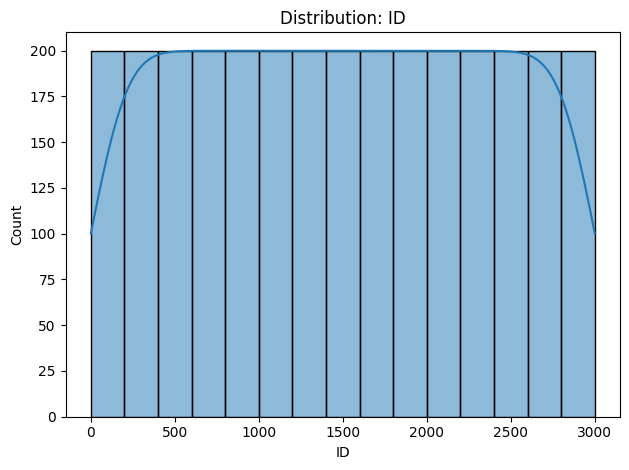

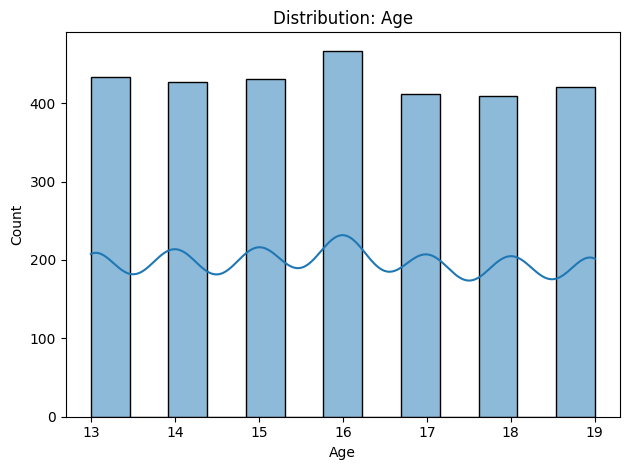

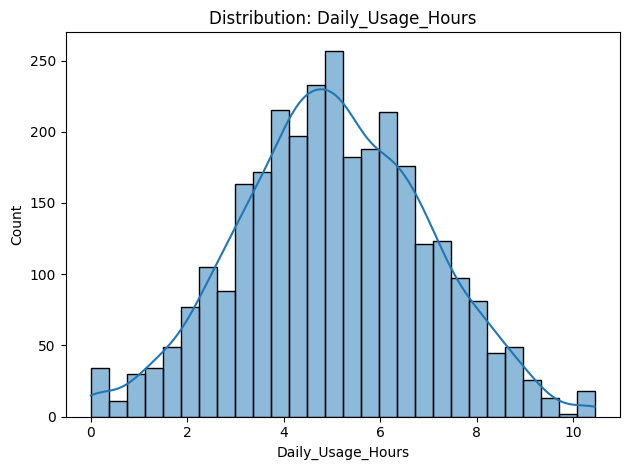

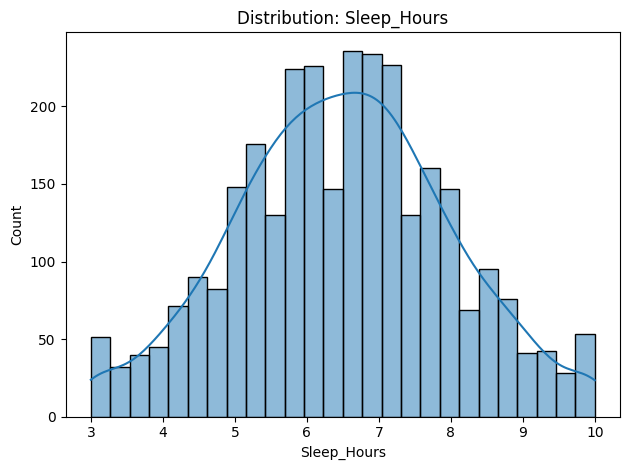

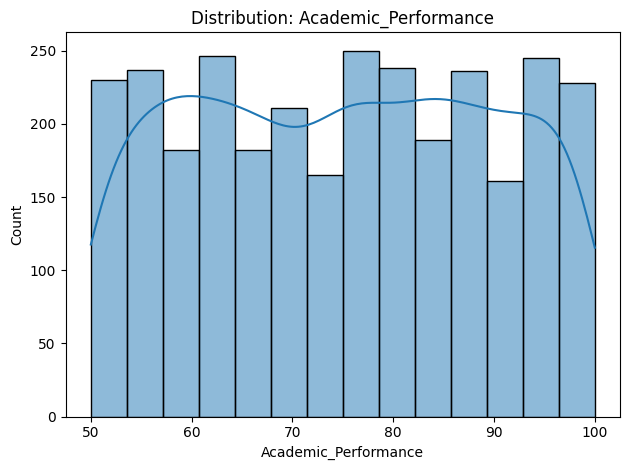

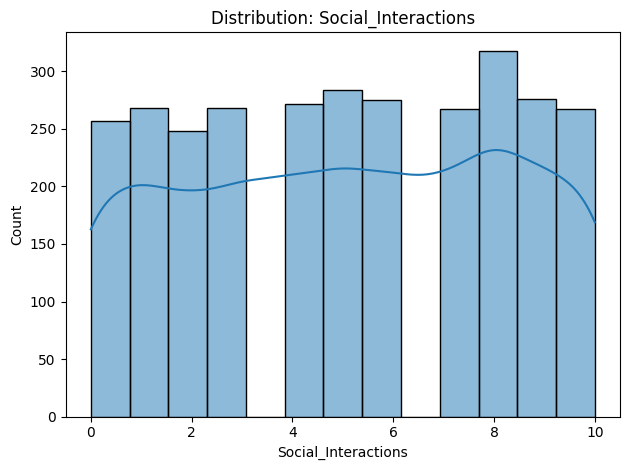

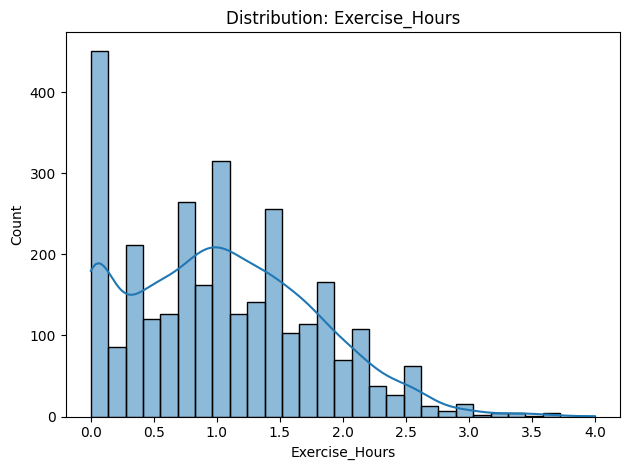

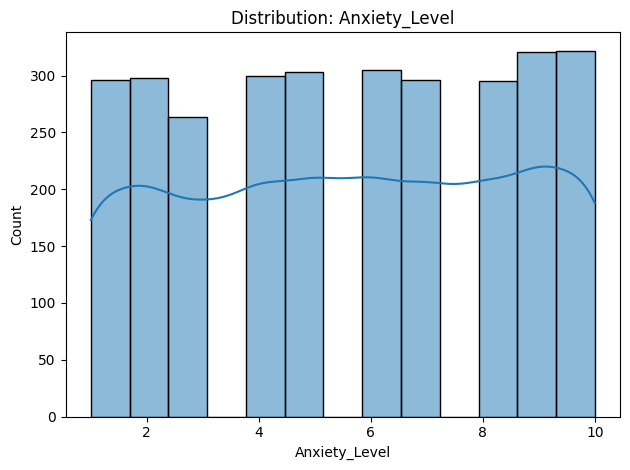

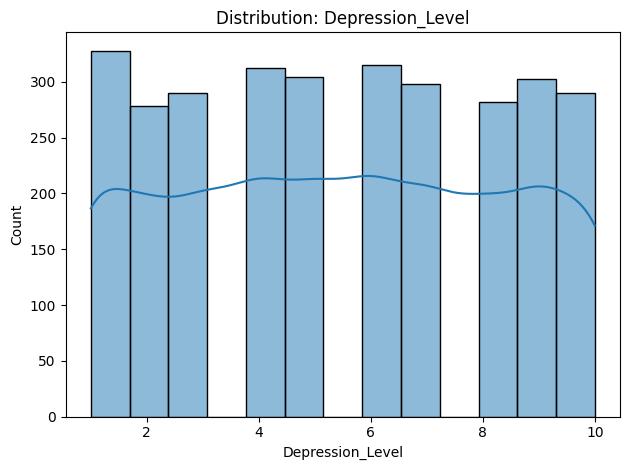

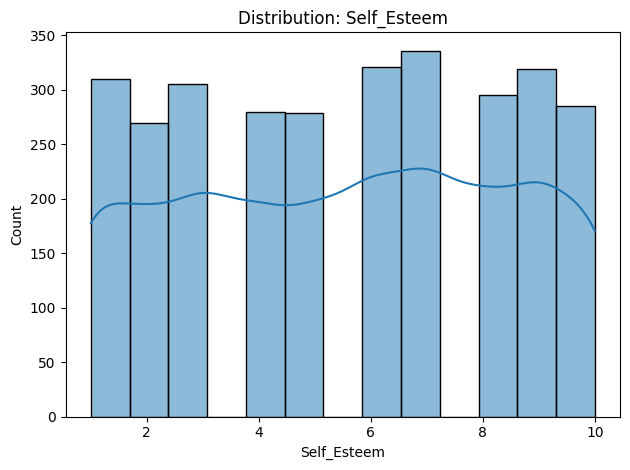

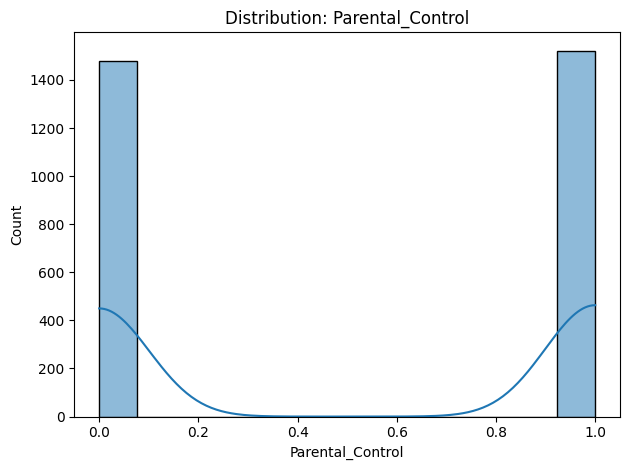

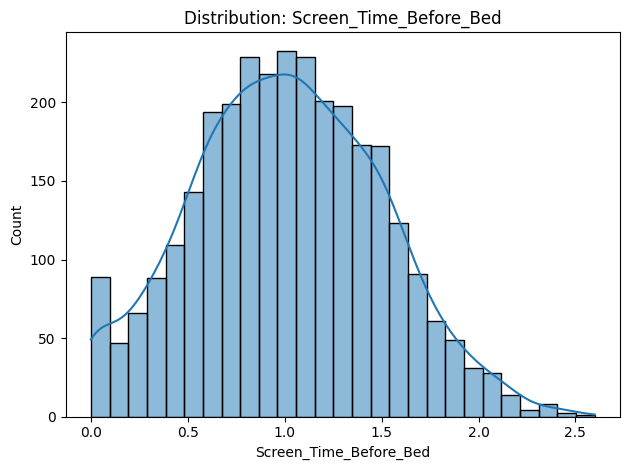

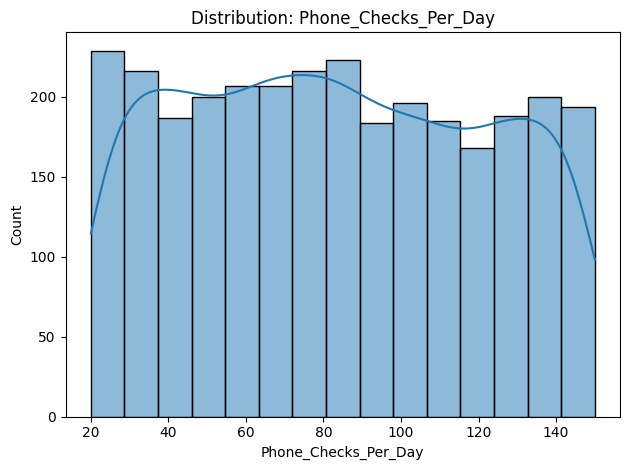

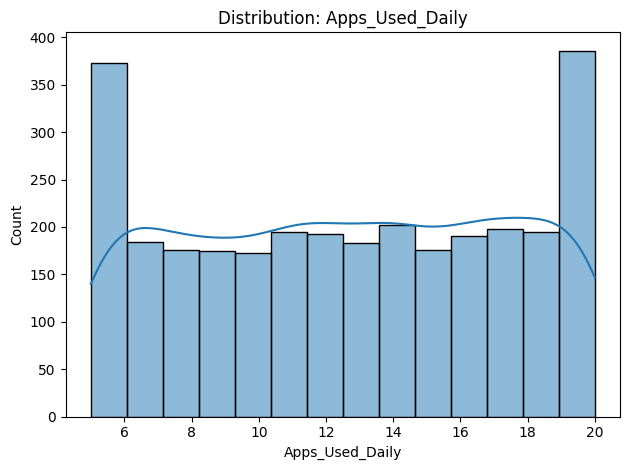

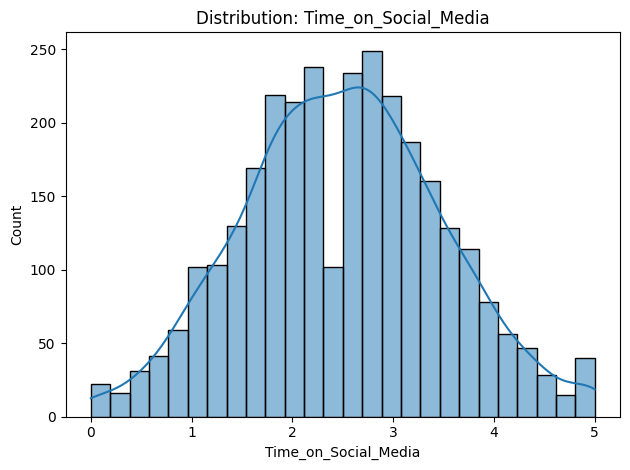

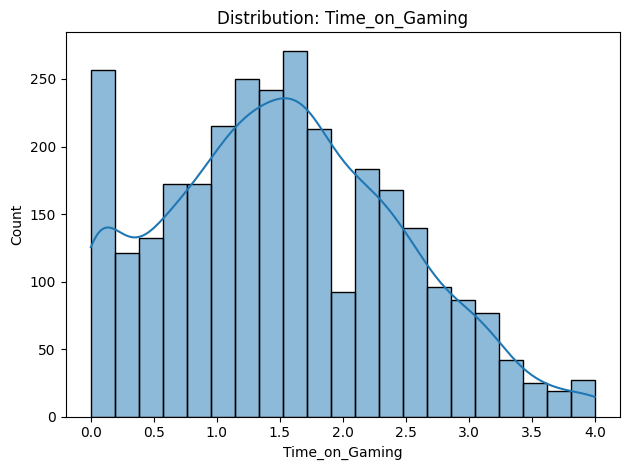

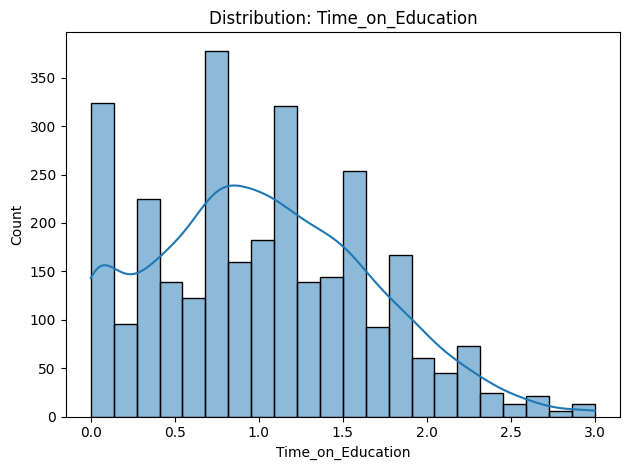

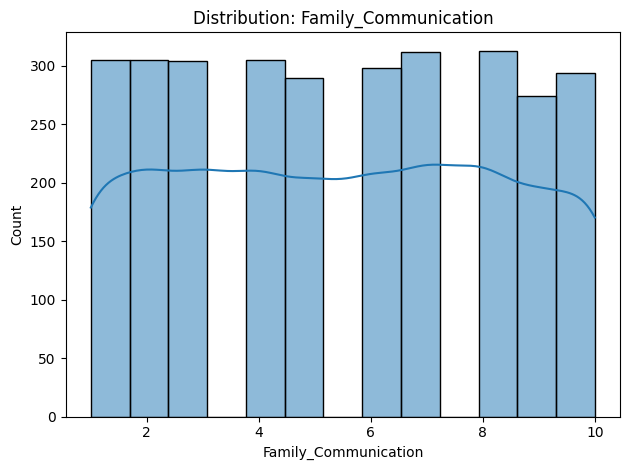

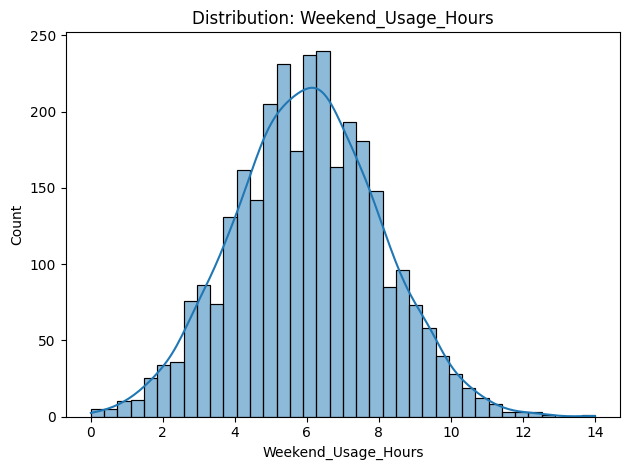

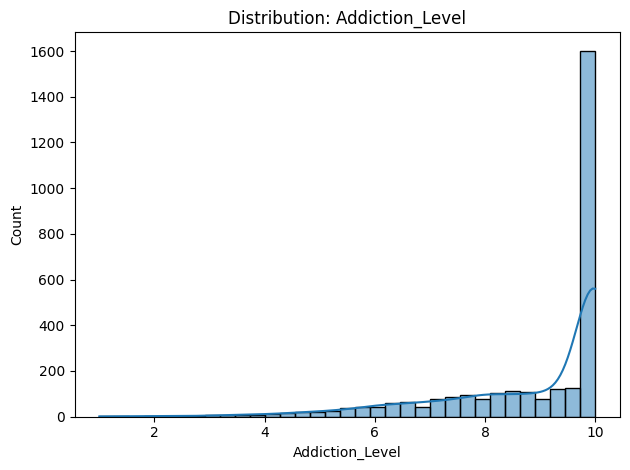

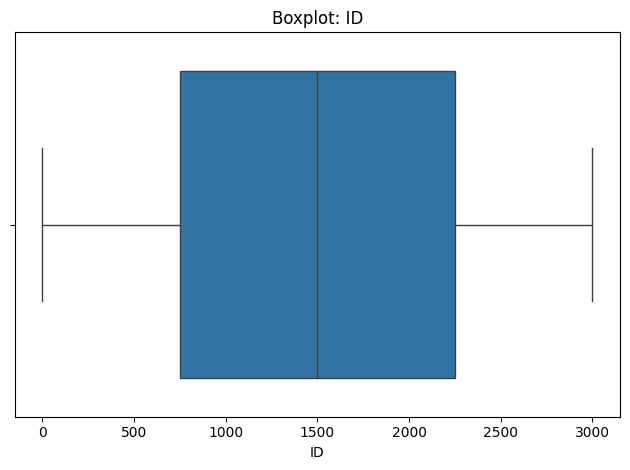

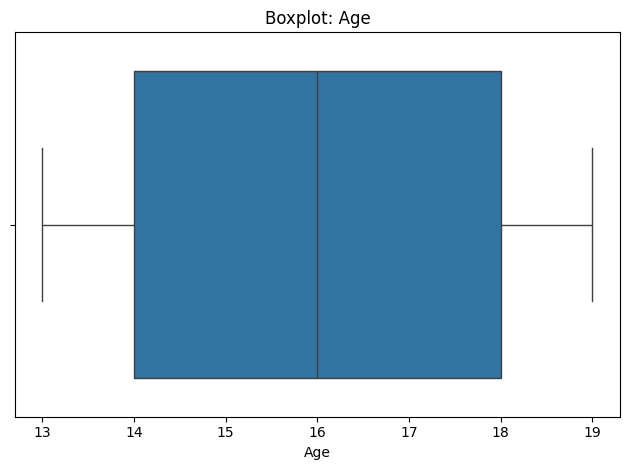

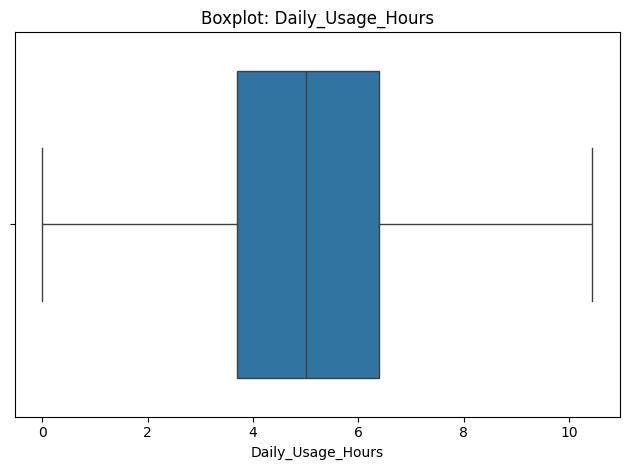

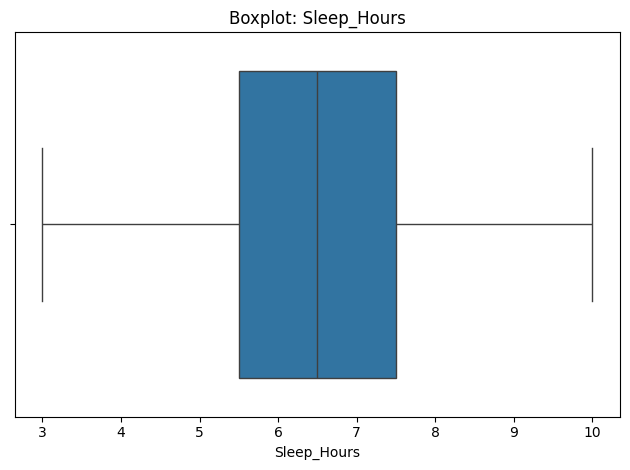

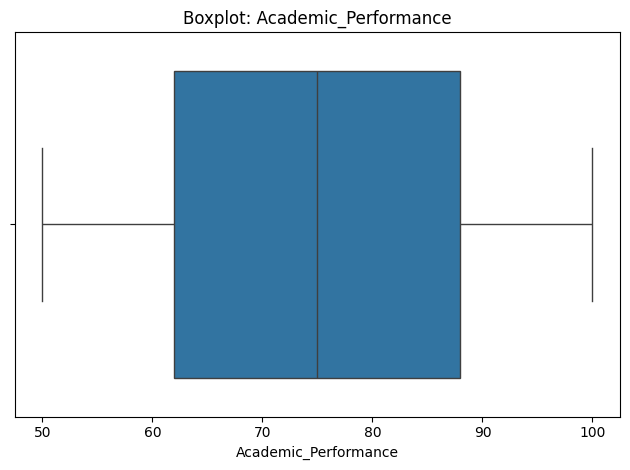

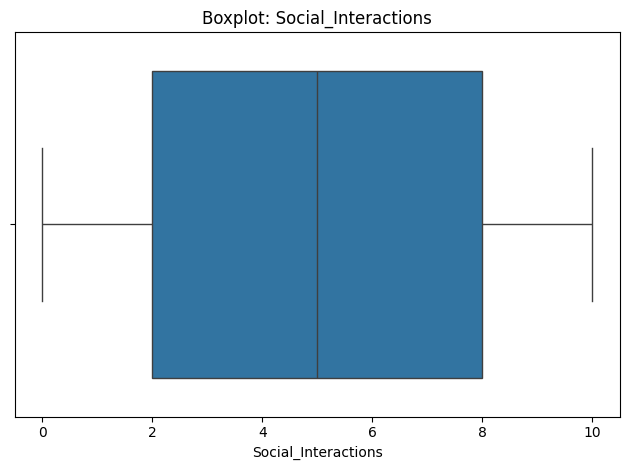

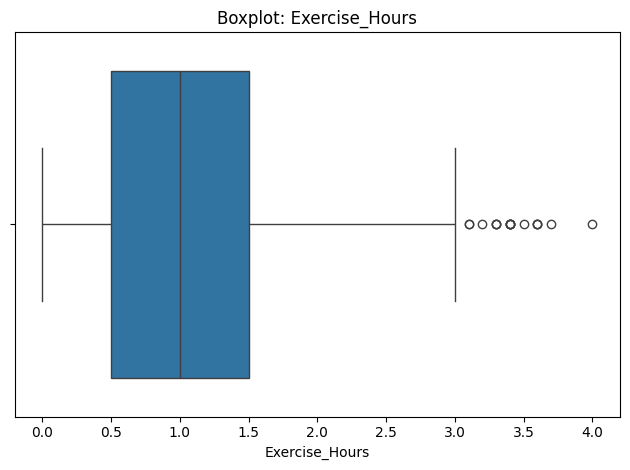

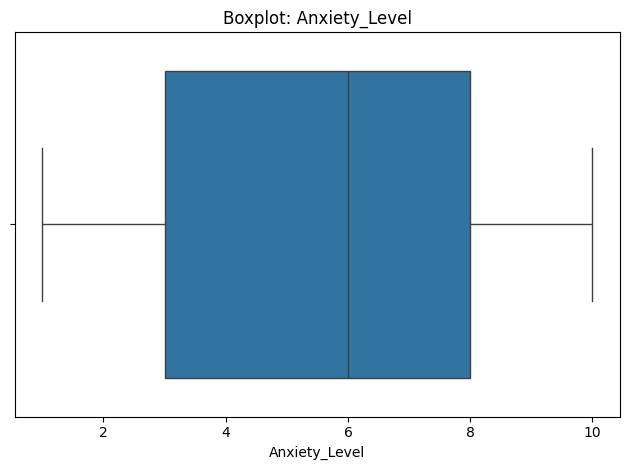

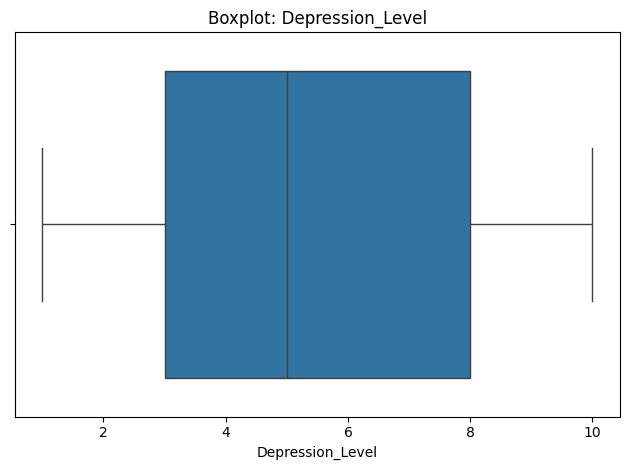

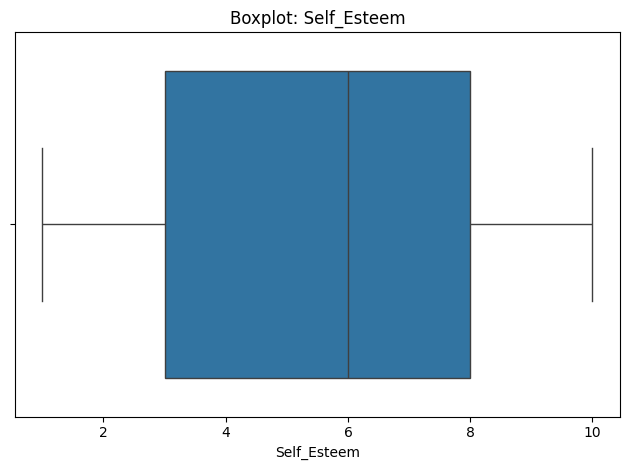

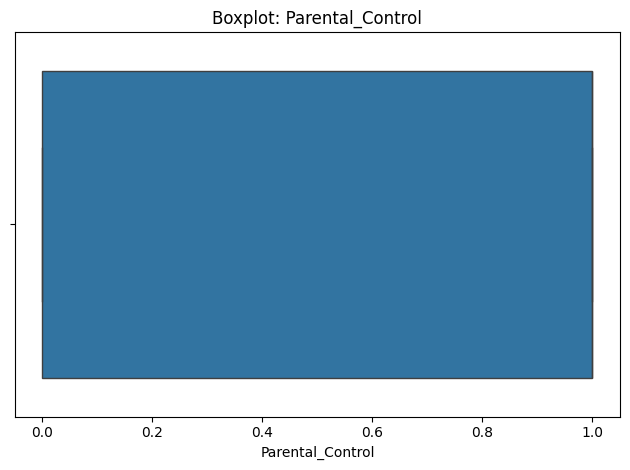

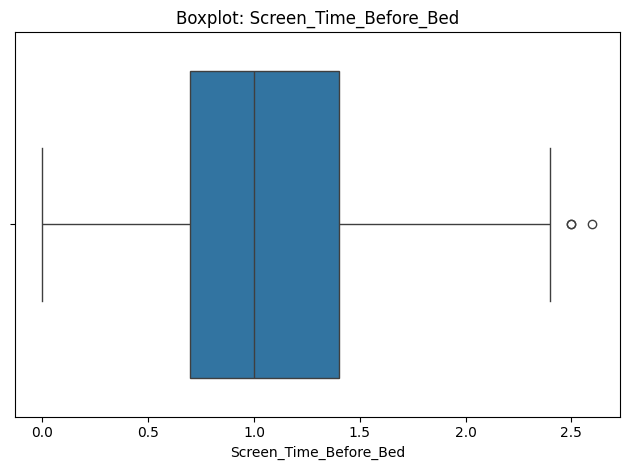

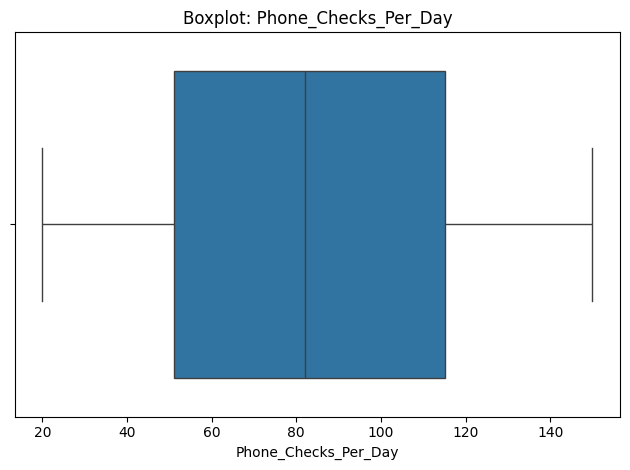

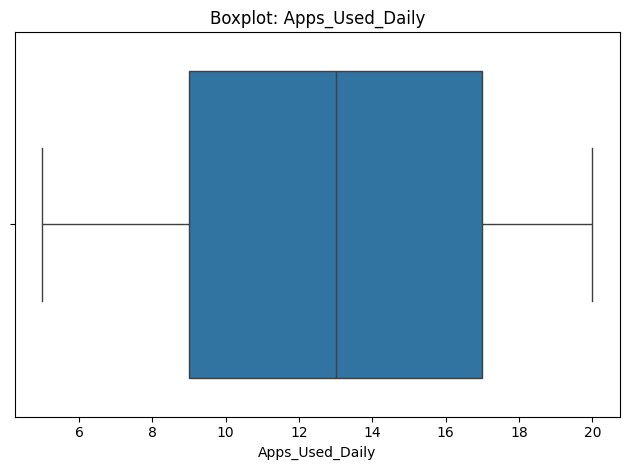

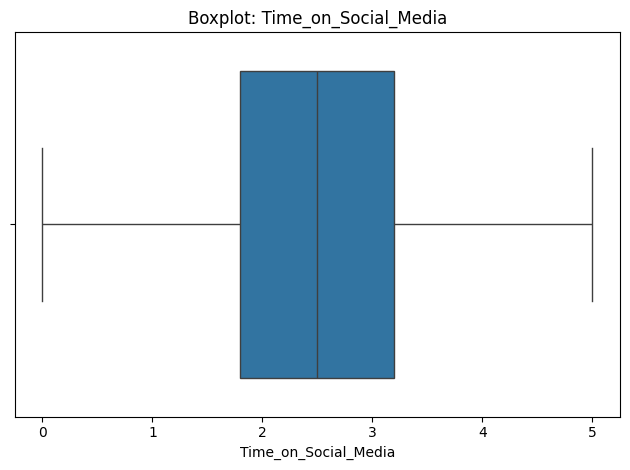

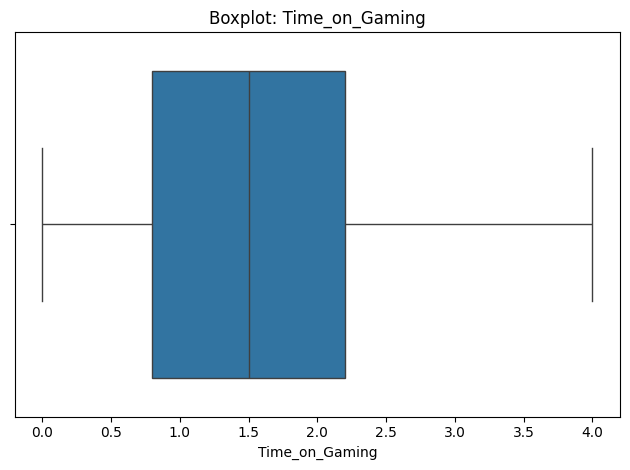

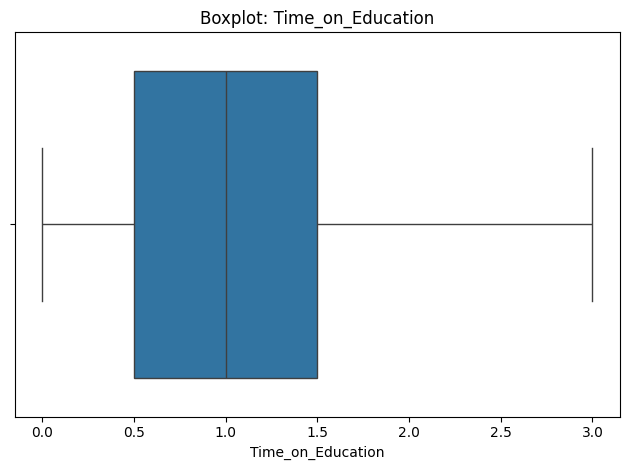

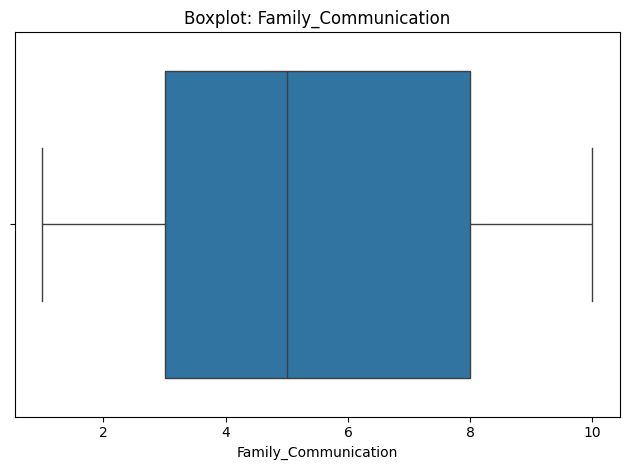

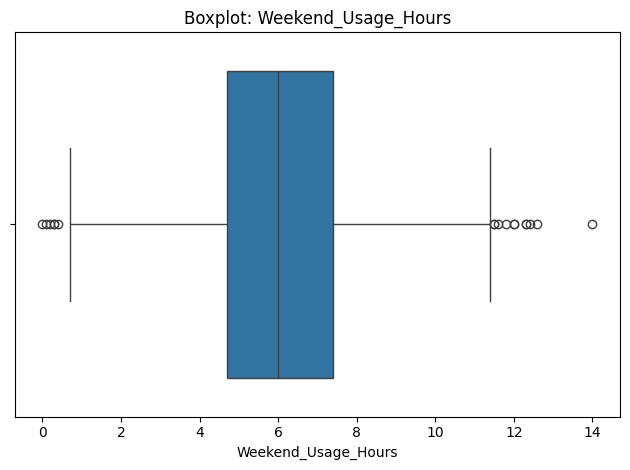

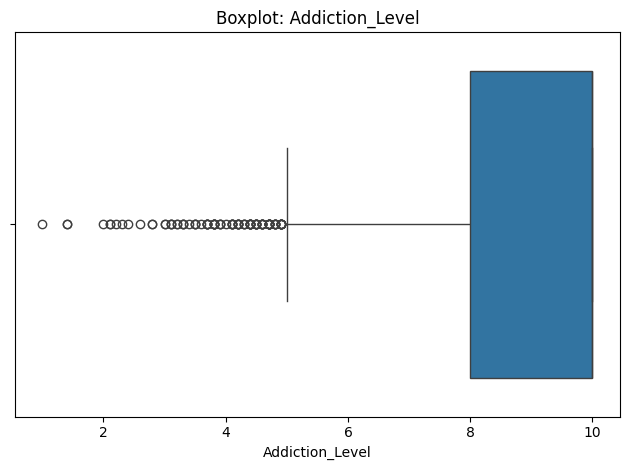

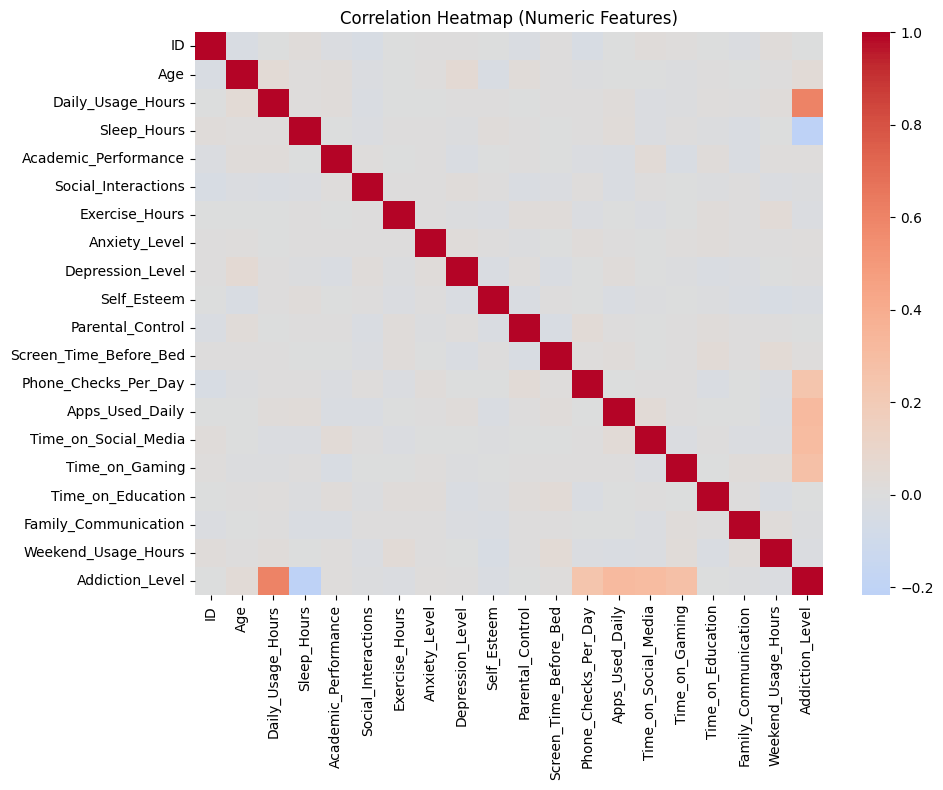

In [8]:
import os

numeric_cols = data.select_dtypes(include=[np.number]).columns

# Create the 'plots' directory if it doesn't exist
if not os.path.exists('plots'):
    os.makedirs('plots')

for col in numeric_cols:
    plt.figure()
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution: {col}')
    plt.tight_layout()
    plt.savefig(f'plots/dist_{col}.png', dpi=150)
    plt.show()

for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot: {col}')
    plt.tight_layout()
    plt.savefig(f'plots/box_{col}.png', dpi=150)
    plt.show()

plt.figure(figsize=(10, 8))
corr = data[numeric_cols].corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap (Numeric Features)')
plt.tight_layout()
plt.savefig('plots/corr_heatmap.png', dpi=150)
plt.show()

Demographics- Age and Gender Distribution

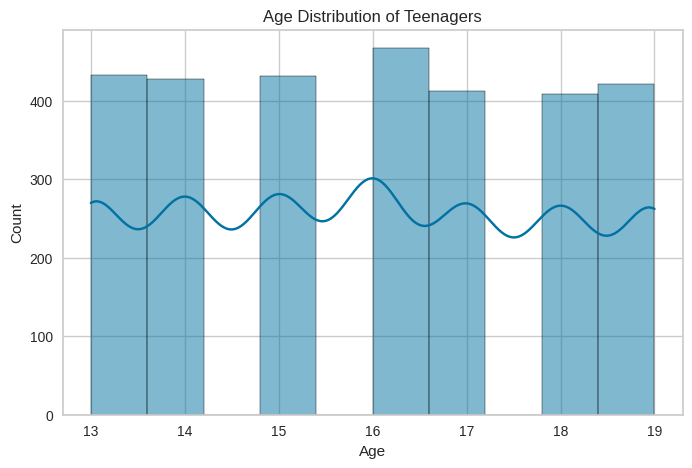

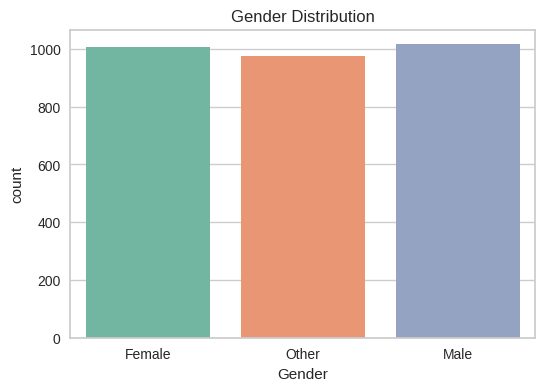

In [19]:
# Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title("Age Distribution of Teenagers")
plt.show()

# Gender distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df, palette="Set2")
plt.title("Gender Distribution")
plt.show()

Screen Time Patterns- Daily, Weekly Trends

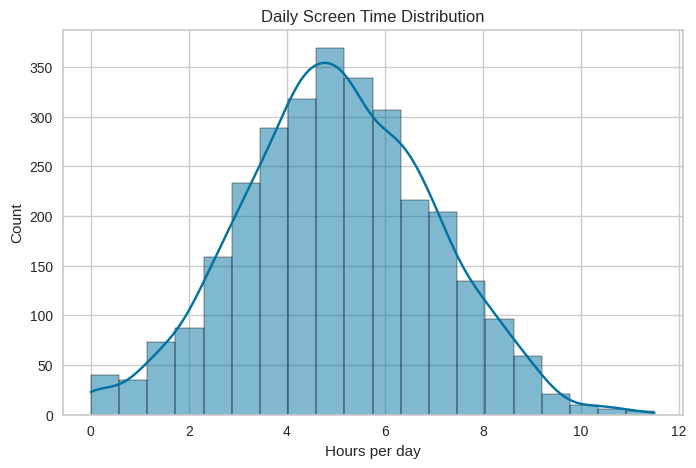

In [21]:
# Daily screen time histogram
plt.figure(figsize=(8,5))
sns.histplot(df['Daily_Usage_Hours'], bins=20, kde=True)
plt.title("Daily Screen Time Distribution")
plt.xlabel("Hours per day")
plt.show()

# Weekly trends (if 'Day' column exists)
if 'Day' in df.columns:
    weekly_usage = df.groupby('Day')['Daily_Screen_Time'].mean()
    weekly_usage.plot(kind='line', marker='o', figsize=(8,5))
    plt.title("Average Screen Time by Day of Week")
    plt.ylabel("Hours")
    plt.show()

Category Wise App- Most Used Applications

In [23]:
if 'Most_Used_App_Category' in df.columns:
    plt.figure(figsize=(8,5))
    sns.countplot(y='Most_Used_App_Category', data=df, order=df['Most_Used_App_Category'].value_counts().index, palette="coolwarm")
    plt.title("Most Used App Categories")
    plt.show()

Behaviorial Patterns - Usage at Different Times

In [24]:
if 'Usage_Time' in df.columns:  # e.g., Morning, Afternoon, Night
    plt.figure(figsize=(7,5))
    sns.countplot(x='Usage_Time', data=df, palette="Set3")
    plt.title("Phone Usage by Time of Day")
    plt.show()

Visualization Coverage

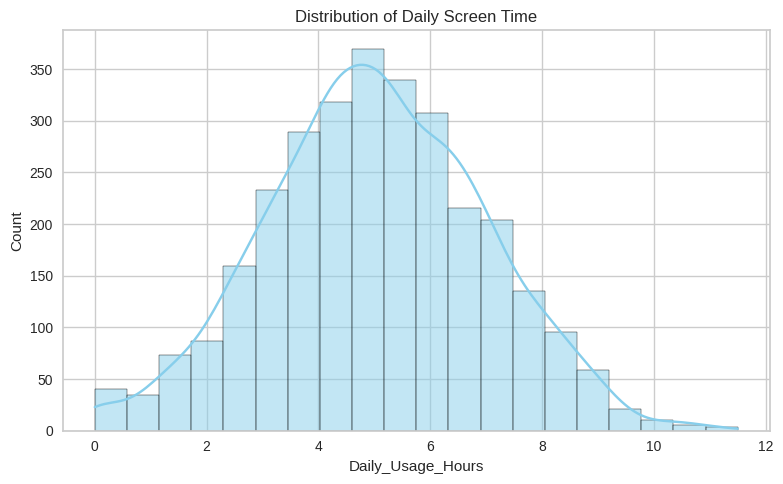

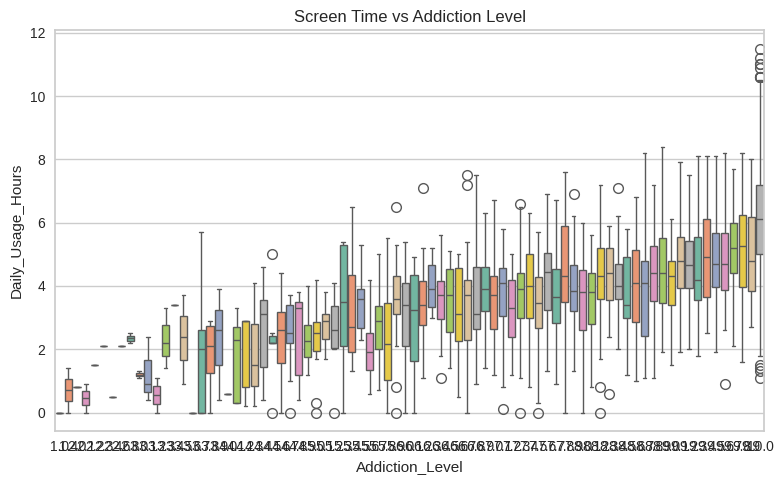

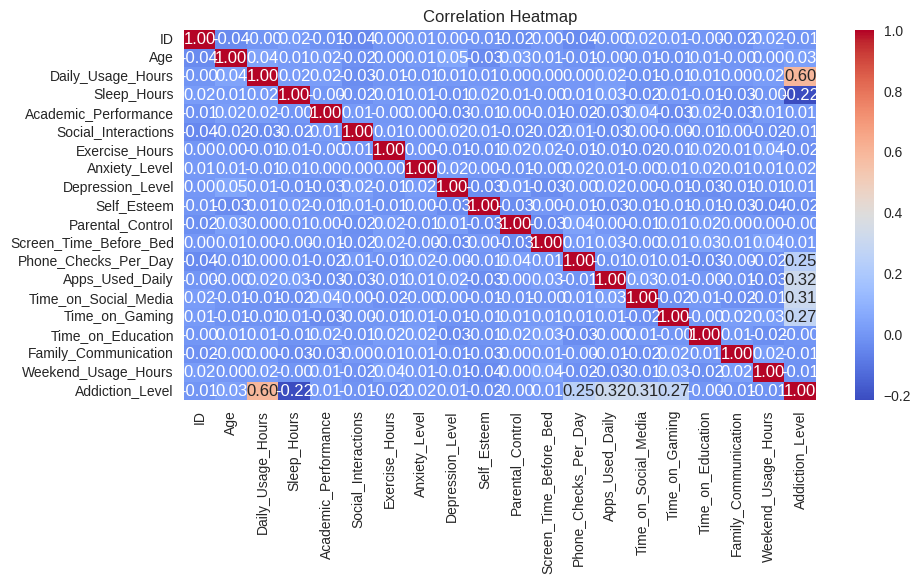

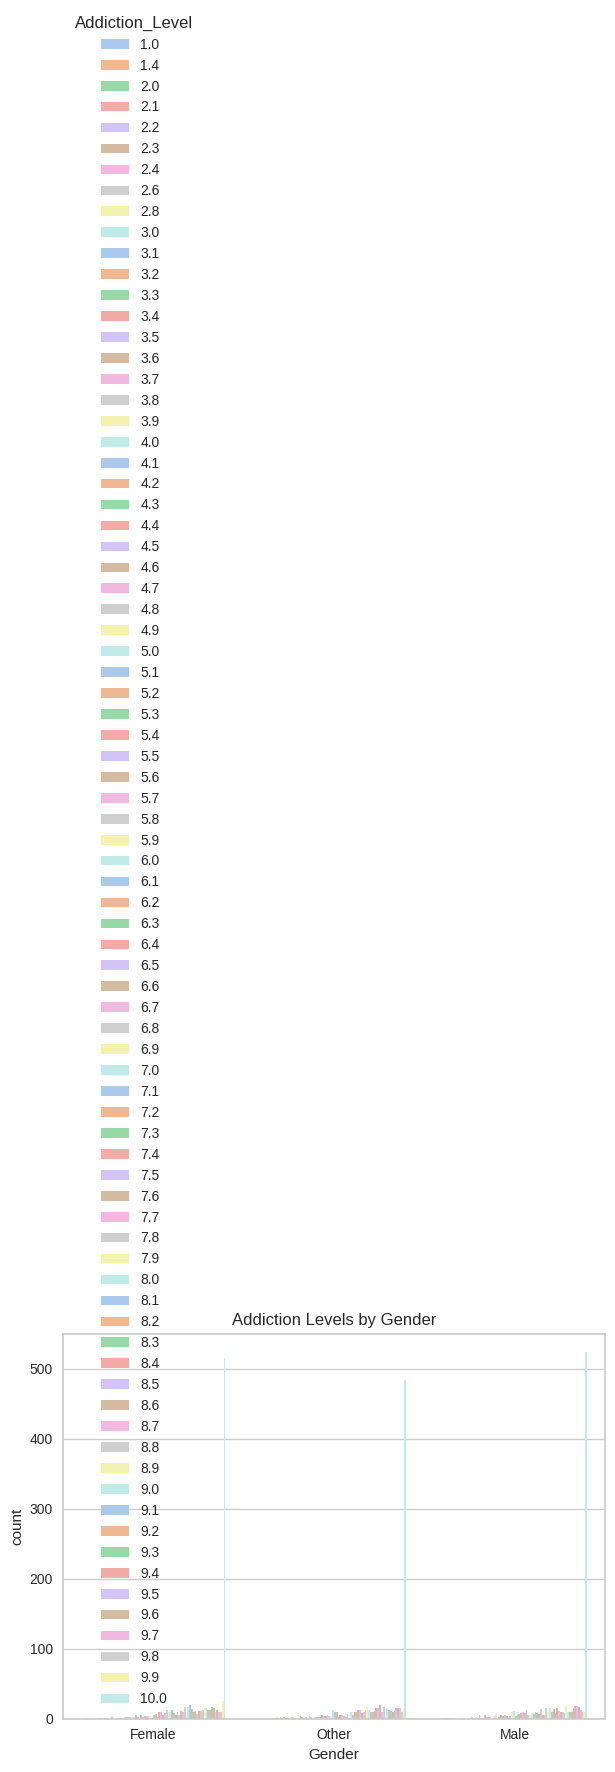

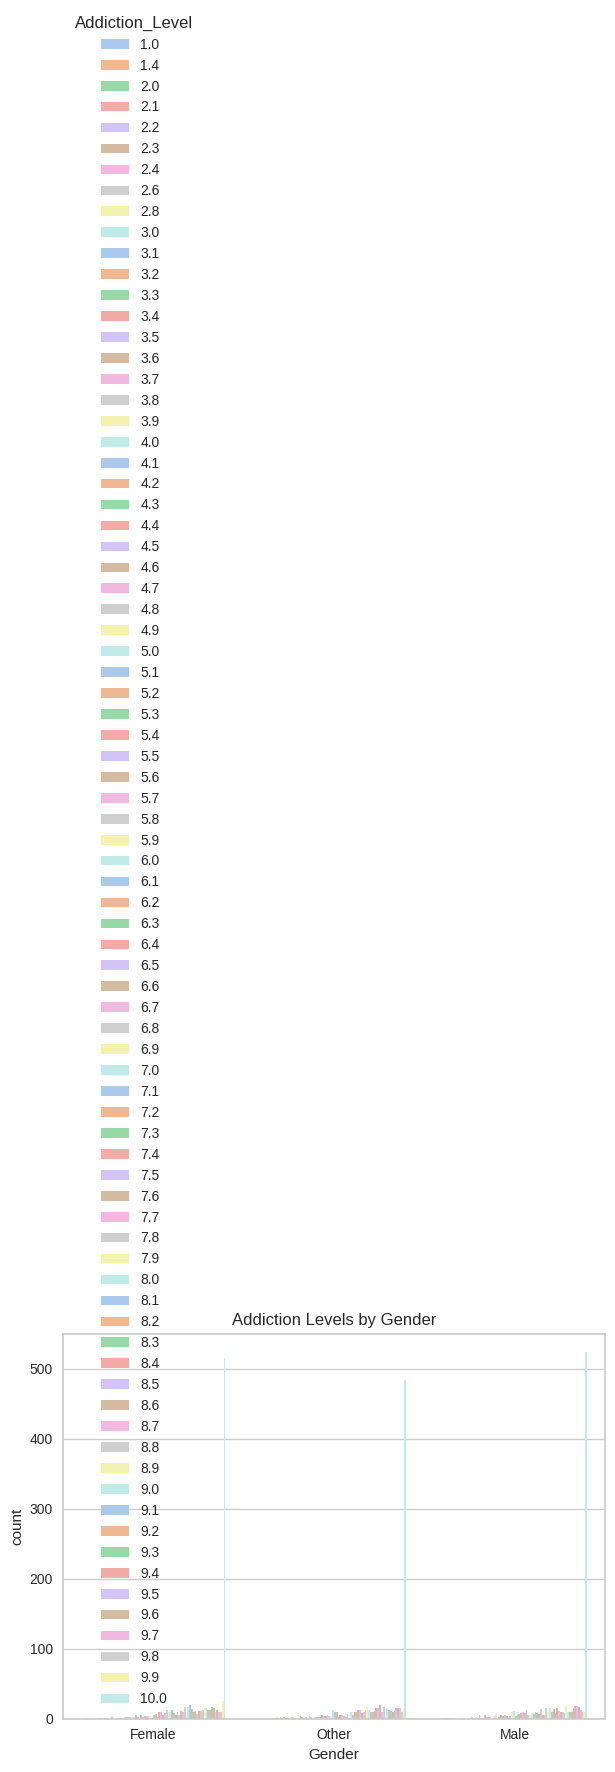

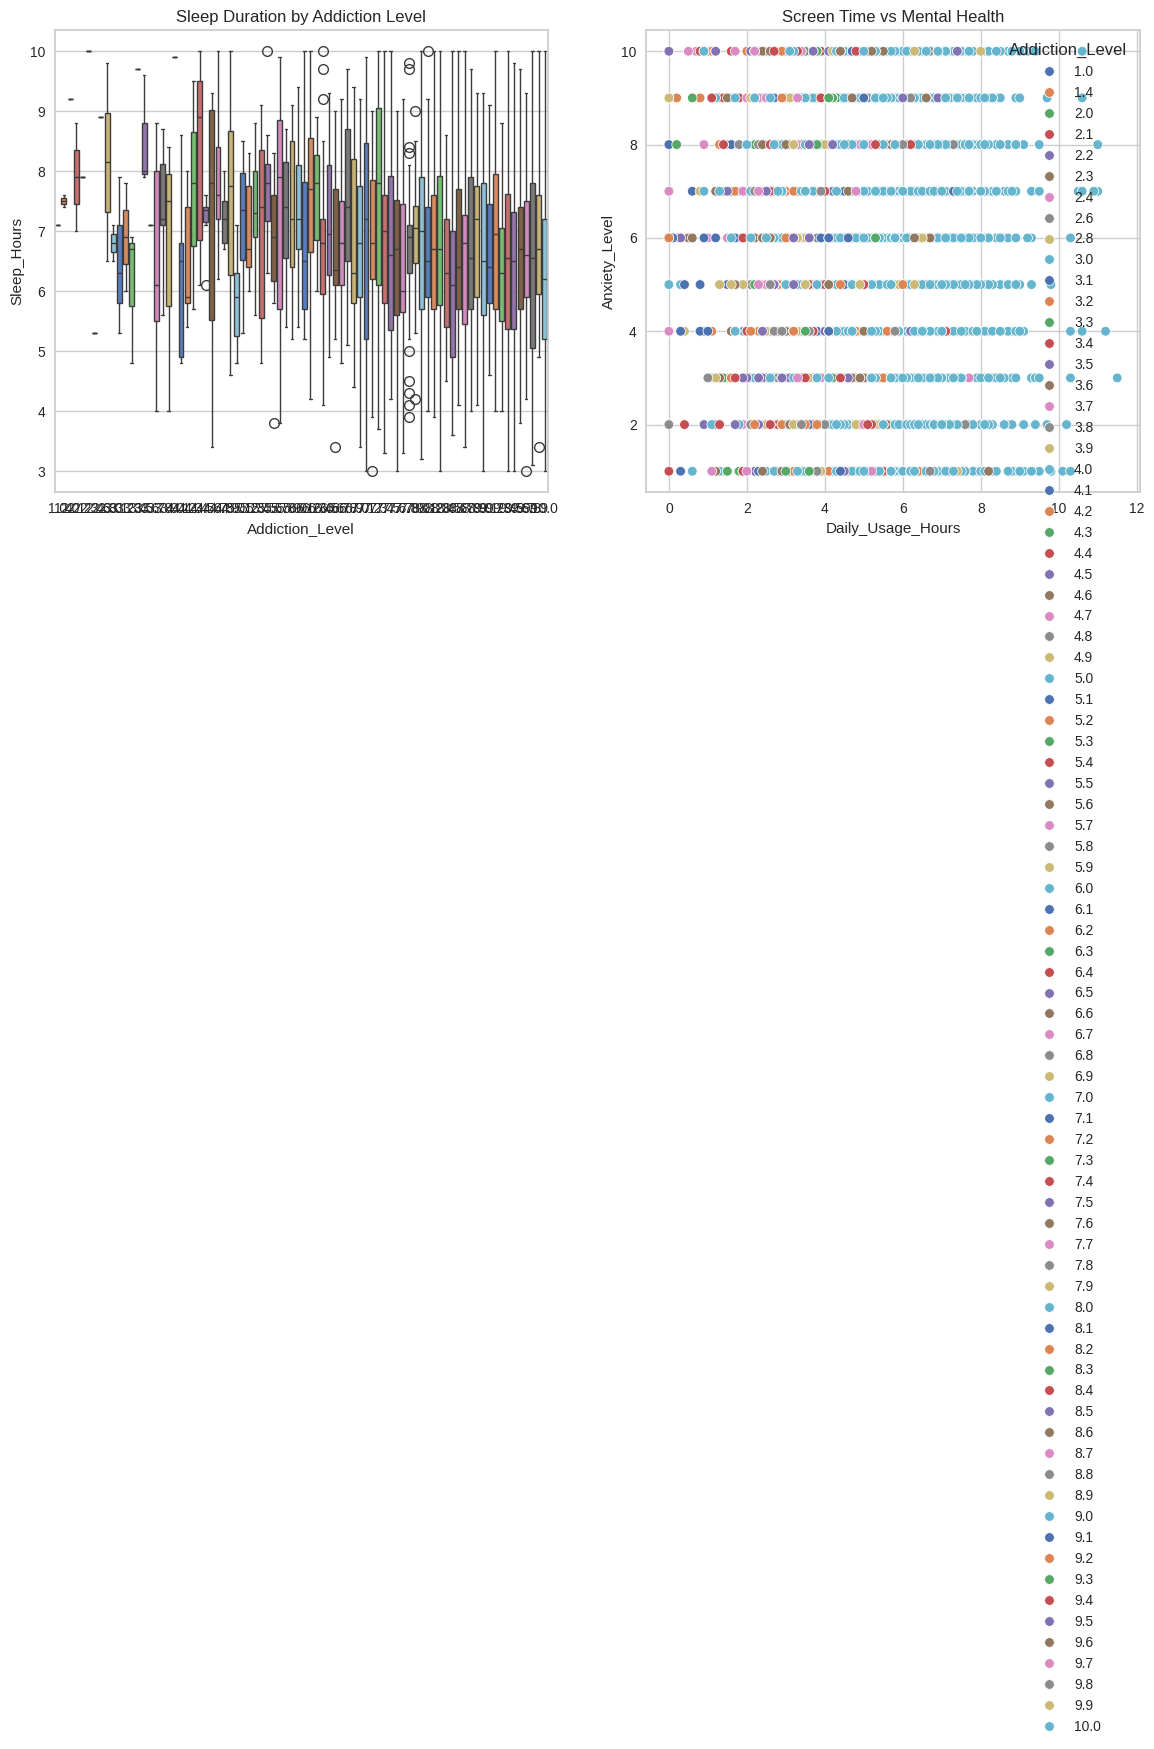

In [27]:
# Histogram - Daily Screen Time
plt.figure(figsize=(8,5))
sns.histplot(df['Daily_Usage_Hours'], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Daily Screen Time")
plt.tight_layout()
plt.savefig('plots/daily_screen_time_hist.png', dpi=150)
plt.show()

# Boxplot - Screen Time by Addiction Level
plt.figure(figsize=(8,5))
sns.boxplot(x='Addiction_Level', y='Daily_Usage_Hours', data=df, palette="Set2")
plt.title("Screen Time vs Addiction Level")
plt.tight_layout()
plt.savefig('plots/screen_time_vs_addiction_boxplot.png', dpi=150)
plt.show()

# Correlation HeatMap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig('plots/correlation_heatmap.png', dpi=150)
plt.show()

# Gender vs Addiction Level
plt.figure(figsize=(7,5))
sns.countplot(x='Gender', hue='Addiction_Level', data=df, palette="pastel")
plt.title("Addiction Levels by Gender")
plt.tight_layout()
plt.savefig('plots/gender_vs_addiction_countplot.png', dpi=150)
plt.show()

# Gender vs Addiction Level
plt.figure(figsize=(7,5))
sns.countplot(x='Gender', hue='Addiction_Level', data=df, palette="pastel")
plt.title("Addiction Levels by Gender")
plt.tight_layout()
plt.savefig('plots/gender_vs_addiction_countplot_2.png', dpi=150) # Added _2 for second identical plot
plt.show()

#Usage Patterns Over Time
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    daily_trend = df.groupby('Date')['Daily_Usage_Hours'].mean()

    plt.figure(figsize=(10,6))
    daily_trend.plot(marker='o')
    plt.title("Daily Screen Time Over Time")
    plt.ylabel("Average Screen Time (hrs)")
    plt.tight_layout()
    plt.savefig('plots/daily_screen_time_trend.png', dpi=150)
    plt.show()

# Multi Dimensional Analysis
fig, axes = plt.subplots(1,2, figsize=(14,6))

# Boxplot
sns.boxplot(x='Addiction_Level', y='Sleep_Hours', data=df, ax=axes[0], palette="muted")
axes[0].set_title("Sleep Duration by Addiction Level")

# Scatterplot
sns.scatterplot(x='Daily_Usage_Hours', y='Anxiety_Level', hue='Addiction_Level', data=df, ax=axes[1], palette="deep")
axes[1].set_title("Screen Time vs Mental Health")

plt.tight_layout()
plt.savefig('plots/multi_dimensional_analysis.png', dpi=150)
plt.show()

Top 5 Activities by Average Daily Time Spent

In [9]:
cat_col = CONFIG.get('app_category')
time_col = CONFIG.get('daily_time_minutes')
if cat_col in data.columns and time_col in data.columns:
    top_acts = (data.groupby(cat_col)[time_col]
                .mean()
                .sort_values(ascending=False)
                .head(5))
    display(top_acts)
    fig = px.bar(top_acts, title='Top 5 App Categories by Avg Daily Minutes')
    fig.write_image('plots/top5_app_categories.png')
    fig.show()
else:
    print('App category breakdown not found in dataset. Skipping.')

App category breakdown not found in dataset. Skipping.


Usage vs Academic Performance

In [13]:
scr = CONFIG.get('screen_time_daily')
acad = CONFIG.get('academic_score')
if scr in data.columns and acad in data.columns:
    fig = px.scatter(data, x=scr, y=acad, trendline='ols',
                     title='Screen Time vs Academic Score')
    fig.write_image('plots/screen_vs_academic.png')
    fig.show()
    corr_val = data[[scr, acad]].corr().iloc[0,1]
    print(f'Pearson correlation between {scr} and {acad}: {corr_val:.3f}')
else:
    print('Required columns missing. Skipping.')

Pearson correlation between Daily_Usage_Hours and Academic_Performance: 0.021


In [11]:
!plotly_get_chrome


Plotly will install a copy of Google Chrome to be used for generating static images of plots.
Chrome will be installed at: None
Do you want to proceed? [y/n] y
Installing Chrome for Plotly...
Chrome installed successfully.
The Chrome executable is now located at: /usr/local/lib/python3.12/dist-packages/choreographer/cli/browser_exe/chrome-linux64/chrome


In [12]:
!pip install -U kaleido

Sleep Patterns by Addiction Level and Bedtime Usage Impact

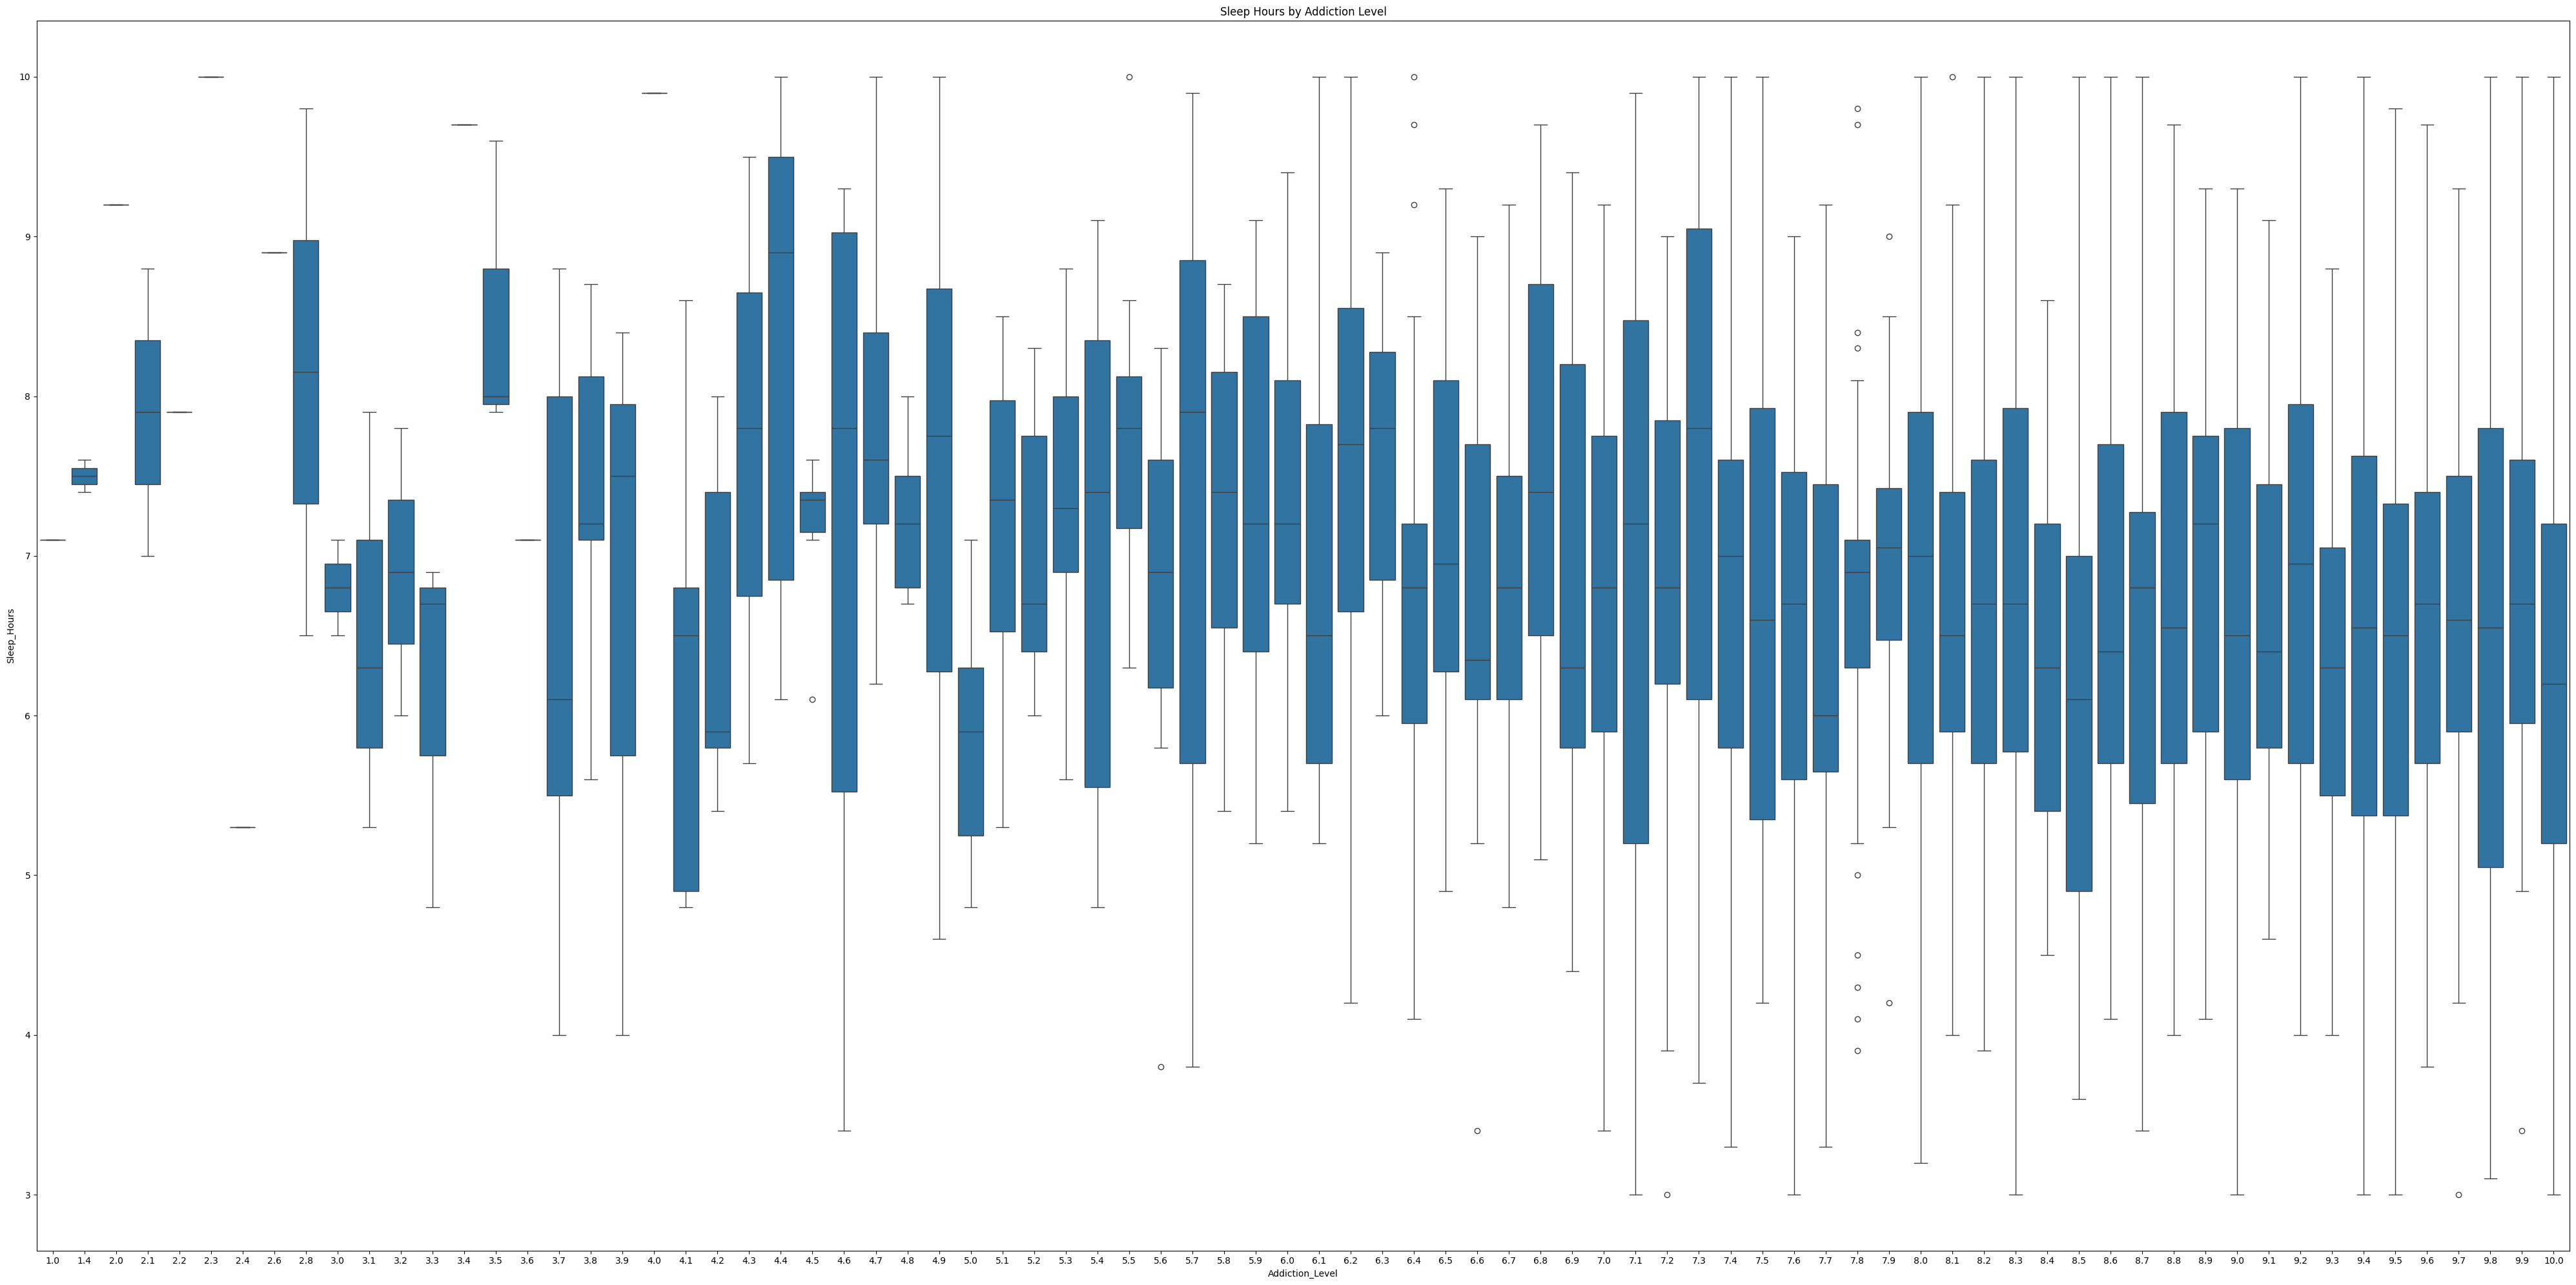

Bedtime usage or sleep hours missing.


In [14]:
add_col = CONFIG.get('addiction_level')
sleep_col = CONFIG.get('sleep_hours')
bed_col = CONFIG.get('bedtime_use')
if add_col in data.columns and sleep_col in data.columns:
    plt.figure(figsize=(40,20))
    sns.boxplot(data=data, x=add_col, y=sleep_col)
    plt.title('Sleep Hours by Addiction Level')
    plt.tight_layout(); plt.savefig('plots/sleep_by_addiction.png', dpi=150); plt.show()
else:
    print('Addiction level or sleep hours missing.')

if bed_col in data.columns and sleep_col in data.columns:
    fig = px.scatter(data, x=bed_col, y=sleep_col, trendline='ols',
                     title='Bedtime Phone Usage vs Sleep Hours')
    fig.write_image('plots/bedtime_vs_sleep.png')
    fig.show()
else:
    print('Bedtime usage or sleep hours missing.')

Mental Health indicators by Addiction Severity

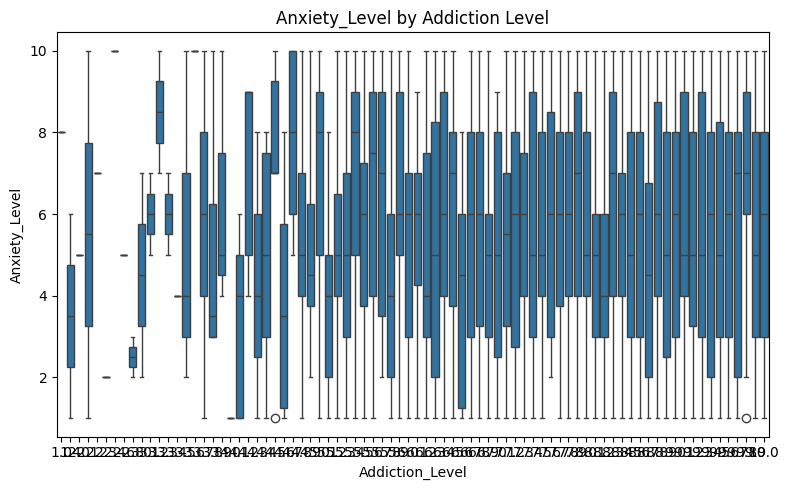

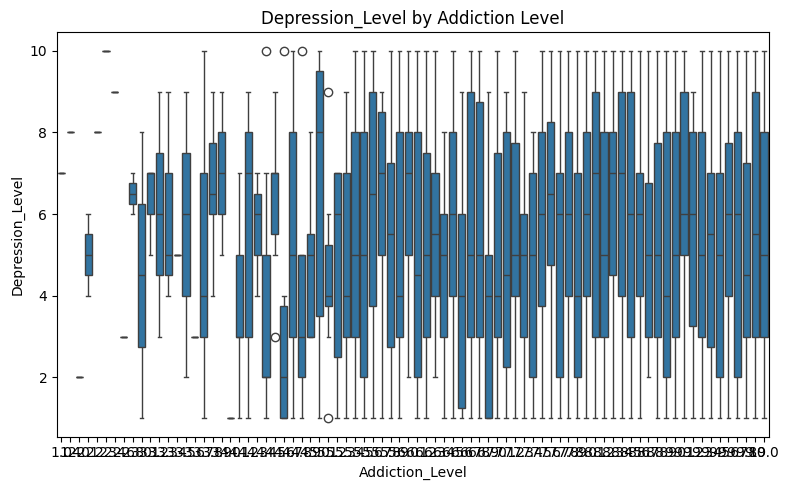

In [15]:
for mh_col in [CONFIG.get('anxiety_score'), CONFIG.get('depression_score')]:
    if mh_col in data.columns and CONFIG.get('addiction_level') in data.columns:
        plt.figure(figsize=(8,5))
        sns.boxplot(data=data, x=CONFIG.get('addiction_level'), y=mh_col)
        plt.title(f'{mh_col} by Addiction Level')
        plt.tight_layout(); plt.savefig(f'plots/{mh_col}_by_addiction.png', dpi=150); plt.show()
    else:
        print(f'{mh_col} or addiction level missing. Skipping.')

Stastical Significance: Predictive Modeling

In [28]:
# Example 1: ANOVA - Sleep hours differ by addiction level?
if CONFIG.get('addiction_level') in data.columns and CONFIG.get('sleep_hours') in data.columns:
    groups = [g[CONFIG.get('sleep_hours')].dropna().values for _, g in data.groupby(CONFIG.get('addiction_level'))]
    if len(groups) >= 2 and all(len(g) > 2 for g in groups):
        f_stat, p_val = stats.f_oneway(*groups)
        print(f'ANOVA Sleep~Addiction: F={f_stat:.3f}, p={p_val:.5f}')
    else:
        print('Not enough groups/samples for ANOVA.')

# Example 2: Pearson correlation - Screen time vs Academic score
if CONFIG.get('screen_time_daily') in data.columns and CONFIG.get('academic_score') in data.columns:
    r, p = stats.pearsonr(data[CONFIG.get('screen_time_daily')], data[CONFIG.get('academic_score')])
    print(f'Pearson r(ScreenTime, Academic): r={r:.3f}, p={p:.5f}')
else:
    print('Columns missing for Pearson correlation.')

Not enough groups/samples for ANOVA.
Pearson r(ScreenTime, Academic): r=0.021, p=0.24083


Predictive Modeling

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
# Removed Yellowbrick import as we'll use Plotly
# from yellowbrick.classifier import ConfusionMatrix
import os # Import os module
import plotly.express as px # Import plotly express
import plotly.graph_objects as go # Import plotly graph objects

# Choose a target: academic_score (regression) or addiction_level (classification)
TARGET = CONFIG.get('academic_score') if CONFIG.get('academic_score') in data.columns else CONFIG.get('addiction_level')
assert TARGET in data.columns, 'Set a valid TARGET present in dataset.'
print('Target:', TARGET)

# Feature list
drop_cols = [CONFIG.get('id'), TARGET]
X = data.drop(columns=[c for c in drop_cols if c in data.columns], errors='ignore')
y = data[TARGET]

num_features = X.select_dtypes(include=[np.number]).columns.tolist()
cat_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ]
)


def is_classification(series, threshold=10):
    # If few unique values, treat as classification
    return series.nunique() <= threshold or series.dtype.name in ['category', 'object']

task = 'classification' if is_classification(y) else 'regression'
print('Detected task:', task)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y if task=='classification' else None)

if task == 'classification':
    models = {
        'LogReg': LogisticRegression(max_iter=1000),
        'RF': RandomForestClassifier(n_estimators=300, random_state=42),
        'GB': GradientBoostingClassifier(random_state=42)
    }
else:
    models = {
        'Linear': LinearRegression(),
        'RF': RandomForestRegressor(n_estimators=300, random_state=42),
        'GB': GradientBoostingRegressor(random_state=42) # Corrected typo
    }

# Create the 'artifacts' directory if it doesn't exist
if not os.path.exists('artifacts'):
    os.makedirs('artifacts')

results = {}
for name, model in models.items():
    pipe = Pipeline(steps=[('preprocess', preprocess), ('model', model)])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    if task == 'classification':
        acc = accuracy_score(y_test, preds)
        f1 = f1_score(y_test, preds, average='weighted')
        results[name] = {'accuracy': acc, 'f1_weighted': f1}
    else:
        rmse = np.sqrt(mean_squared_error(y_test, preds)) # Calculate RMSE manually
        r2 = r2_score(y_test, preds)
        results[name] = {'rmse': rmse, 'r2': r2}
    # Save each trained pipeline
    import joblib
    joblib.dump(pipe, f'artifacts/model_{task}_{name}.joblib')
    print(f'Trained {name} ✓')

pd.DataFrame(results)

best_model_name = max(results, key=lambda k: list(results[k].values())[0] if task=='classification' else -results[k]['rmse'])
print('Best model:', best_model_name, results[best_model_name])
import joblib
best_pipe = joblib.load(f'artifacts/model_{task}_{best_model_name}.joblib')

if task == 'classification':
    preds = best_pipe.predict(X_test)
    print(classification_report(y_test, preds))
    # Plotly Confusion Matrix
    cm = confusion_matrix(y_test, preds)
    fig = go.Figure(data=go.Heatmap(z=cm,
                                   x=[str(c) for c in best_pipe.classes_], # Use model classes for labels
                                   y=[str(c) for c in best_pipe.classes_],
                                   colorscale='Blues'))
    fig.update_layout(title=f'Confusion Matrix — {best_model_name}',
                      xaxis_title='Predicted',
                      yaxis_title='True')
    fig.show()

else:
    preds = best_pipe.predict(X_test)
    # Plotly Scatter plot for regression
    fig = px.scatter(x=y_test, y=preds, opacity=0.6,
                     labels={'x':'True', 'y':'Predicted'},
                     title=f'Predicted vs True — {best_model_name}')
    fig.show()

Target: Academic_Performance
Detected task: regression
Trained Linear ✓
Trained RF ✓
Trained GB ✓
Best model: GB {'rmse': np.float64(15.124985819014166), 'r2': -0.015959679542780325}
